# **CAISO** - Load, Fuel Mix, and LMP Data

This notebook walk through how to use `gridstatus` to access to the data availabe on [OASIS](http://oasis.caiso.com/).

While we will be using CAISO in this example, but most of this API will also work with all other ISOs.

In [1]:
import gridstatus
import pandas as pd
import plotly.express as px

In [2]:
caiso = gridstatus.CAISO()

let's also define a method to make it easier to name our files

In [3]:
folder = "../../../archived_iso_data/caiso/"
def make_filename(name, start, end):
    return f"{name}_{start.strftime('%Y-%m-%d')}_{end.strftime('%Y-%m-%d')}.csv" 

## Historical Fuel Mix

In [4]:
start = pd.Timestamp("April 10, 2018").normalize()
end = pd.Timestamp.now().normalize()

mix_df = caiso.get_fuel_mix(start, end=end, verbose=False)
mix_df.to_csv(make_filename(folder+"fuel_mix", start, end), index=None)

100%|██████████| 1662/1662 [14:11<00:00,  1.95it/s]


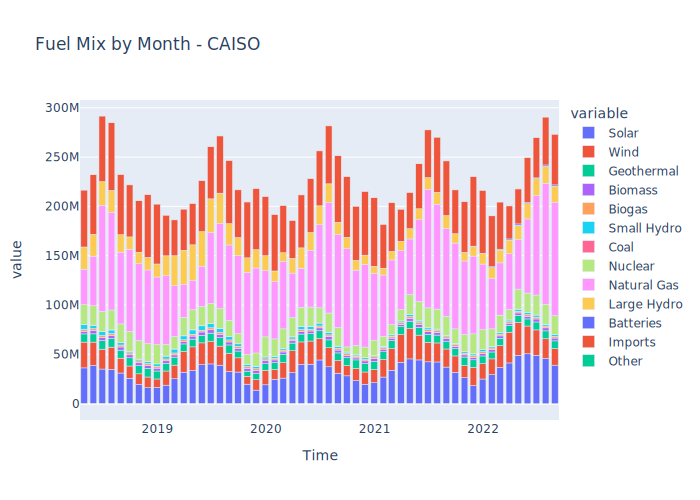

In [5]:
monthly_mix = mix_df.set_index("Time").resample("MS").sum().reset_index()[1:-1]
fig = px.bar(monthly_mix, x="Time", y=monthly_mix.columns[1:], title="Fuel Mix by Month - CAISO")
fig.show("svg")

## Historical Load 

In [6]:
start = pd.Timestamp("April 10, 2018").normalize()
end = pd.Timestamp.now().normalize()

load_df = caiso.get_load(start, end=end, verbose=False)

load_df.to_csv(make_filename(folder+"load", start, end), index=None)

100%|██████████| 1662/1662 [11:33<00:00,  2.40it/s]


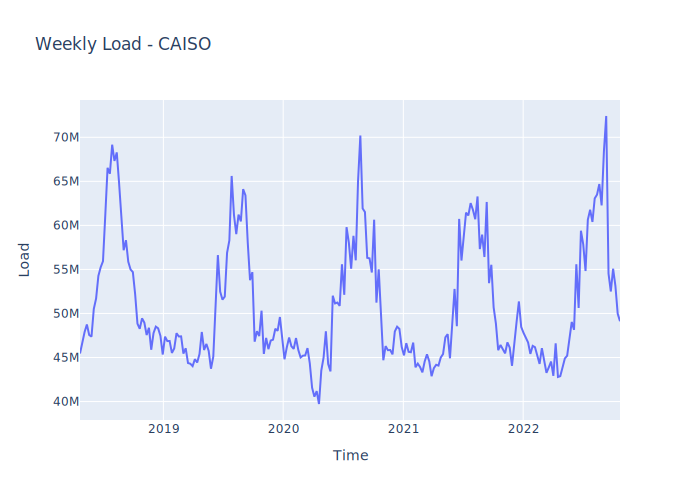

In [7]:
daily_load = load_df.set_index("Time").resample("W").sum().reset_index()[1:-1]
fig = px.line(daily_load, x="Time", y="Load", title="Weekly Load - CAISO")
fig.show("svg")

## Historical Locational Marginal Pricing (LMP)

You can supply whatever nodes or market you'd like, but for now let's download data for 3 trading hubs in the Day Head Hourly Market

In [8]:
start = pd.Timestamp("Jan 01, 2022").normalize()
end = pd.Timestamp.now().normalize()

locations = ['TH_NP15_GEN-APND', 'TH_SP15_GEN-APND', 'TH_ZP26_GEN-APND']

lmp_df = caiso.get_lmp(start=start,  
                                  end=end,
                                  market='DAY_AHEAD_HOURLY', 
                                  locations=locations, 
                                  sleep=5)

lmp_df.to_csv(make_filename(folder+"dam_lmp", start, end), index=None)

100%|██████████| 10/10 [03:56<00:00, 23.68s/it]


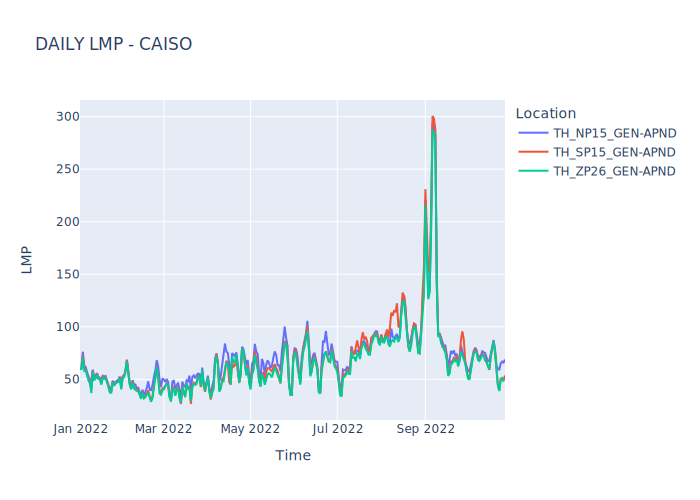

In [9]:
daily_lmp = lmp_df.set_index("Time").groupby("Location").resample("1D").mean().reset_index()[1:-1]
fig = px.line(daily_lmp, x="Time", y="LMP", title="DAILY LMP - CAISO", color="Location")
fig.show("svg")

## Gas Prices

CAISO also publish information about gas prices and greenhouse gas allownces that we will download

In [10]:
start = start = pd.Timestamp("Jan 01, 2022").normalize()
end = pd.Timestamp.now().normalize()

gas_price_df = caiso.get_gas_prices(start=start, end=end, fuel_region_id="FRPGE2GHG")

gas_price_df.to_csv(make_filename(folder+"gas_prices", start, end), index=None)

100%|██████████| 10/10 [00:58<00:00,  5.81s/it]


In [11]:
start = start = pd.Timestamp("Jan 01, 2022").normalize()
end = pd.Timestamp.now().normalize()

ghg_df = caiso.get_ghg_allowance(start=start, end=end)

ghg_df.to_csv(make_filename(folder+"ghg_allowance", start, end), index=None)

100%|██████████| 10/10 [00:55<00:00,  5.52s/it]
